In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

In [3]:
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r',fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [4]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [5]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5
           )
    return ax

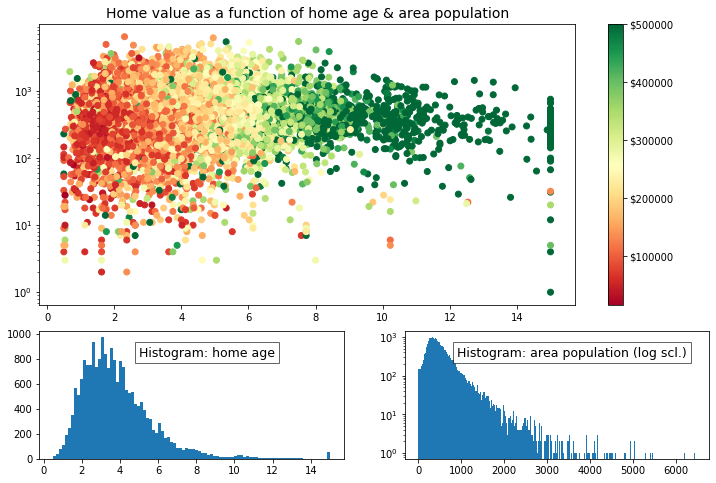

In [6]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan = 2, rowspan = 2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title(
    'Home value as a function of home age & area population',
    fontsize=14
)

sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')